# ASCII Converter

We will convert ASCII files as used in <a href="https://github.com/micromouseonline/mazefiles.git" target="_blank">mazefiles</a> into a suitable format

In [1]:
%matplotlib inline
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_maze(file_name):
    WH_BIT = 1
    WV_BIT = 2

    with open(file_name, 'r') as fh:
        txt = fh.read()
        
    txt = txt.splitlines()
    post_char = txt[0][0]

    wall_horizontal = txt[::2]
    wall_horizontal = [
        [
            1 if wall == '---' else 0
            for wall in row.lstrip(post_char).split(post_char)
        ]
        for row in wall_horizontal
    ]
    wall_horizontal = np.array(wall_horizontal).astype('uint8')
    
    wall_vertical = txt[1::2]
    wall_vertical = [
        [1 if wall == '|' else 0 for wall in column[::4]]
        for column in wall_vertical
    ]
    wall_vertical.append([0] * 17)
    wall_vertical = np.array(wall_vertical).astype('uint8')
    
    wall_horizontal *= WH_BIT
    wall_vertical *= WV_BIT
    
    return wall_horizontal + wall_vertical

In [3]:
m = read_maze('maze_in/maze.txt')

In [4]:
for line in m:
    l1 = ''
    l2 = ''
    for l in line:
        if l & 1:
            l1 += 'o---'
        else:
            l1 += 'o   '
        if l & 2:
            l2 += '|   '
        else:
            l2 += '    '
    print(l1)
    print(l2)

o---o---o---o---o---o---o---o---o---o---o---o---o---o---o---o---o   
|                                               |               |   
o   o   o   o---o   o---o   o---o   o---o---o   o---o   o   o   o   
|   |   |   |       |           |       |           |   |   |   |   
o   o   o   o   o---o   o---o---o---o   o   o   o   o   o---o   o   
|   |   |       |               |   |   |   |   |               |   
o   o   o   o   o   o---o   o   o   o   o   o   o   o   o---o   o   
|           |       |       |   |           |   |   |       |   |   
o---o   o---o   o---o   o   o   o   o   o---o   o   o   o   o   o   
|   |   |               |   |   |   |   |   |   |   |   |       |   
o   o   o   o---o---o---o   o   o   o   o   o   o   o   o   o   o   
|   |       |               |   |   |       |   |           |   |   
o   o   o   o   o---o---o---o   o   o---o   o   o---o   o---o   o   
|       |                   |       |       |                   |   
o   o---o---o---o---o   o---o---o-

In [5]:
def find_walls(maze):
    index_y = 0
    is_wall_y = [False] * maze.shape[0]
    wall_y_start = [None] * maze.shape[0]
    walls = []
    for line in maze:
        is_wall_x = False
        index_x = 0
        for l in line:
            if l & 1:
                if not is_wall_x:
                    wall_x_start = [index_x, index_y]
                    is_wall_x = True
            else:
                if is_wall_x:
                    wall_x_end = [index_x, index_y]
                    walls.append([wall_x_start, wall_x_end])
                    is_wall_x = False
            if l & 2:
                if not is_wall_y[index_x]:
                    wall_y_start[index_x] = [index_x, index_y]
                    is_wall_y[index_x] = True
            else:
                if is_wall_y[index_x]:
                    wall_y_end = [index_x, index_y]
                    walls.append([wall_y_start[index_x], wall_y_end])
                    is_wall_y[index_x] = False
            index_x += 1
        index_y += 1
    return np.array(walls)

In [6]:
walls = find_walls(m)

In [7]:
data = np.zeros(2*walls.shape[0], dtype=mesh.Mesh.dtype)
index = 0
for wall in walls:
    y_dim = 16
    space = 50
    if wall[0, 0] == wall[1, 0]:
        p0 = [space * wall[0, 0], space * (y_dim - wall[0, 1]), 0]
        p1 = [space * wall[1, 0], space * (y_dim - wall[1, 1]), 0]
        p2 = [space * wall[0, 0], space * (y_dim - wall[0, 1]) + 2, 0]
        p3 = [space * wall[1, 0], space * (y_dim - wall[1, 1]) + 2, 0]
    else:
        p0 = [space * wall[0, 0], space * (y_dim - wall[0, 1]), 0]
        p1 = [space * wall[1, 0], space * (y_dim - wall[1, 1]), 0]
        p2 = [space * wall[0, 0] + 2, space * (y_dim - wall[0, 1]), 0]
        p3 = [space * wall[1, 0] + 2, space * (y_dim - wall[1, 1]), 0]
    data['vectors'][index] = np.array([p0, p1, p2])
    data['vectors'][index + 1] = np.array([p1, p2, p3])
    index += 2
    
env = mesh.Mesh(data, remove_empty_areas=False)
env.update_units()

In [8]:
triangles = []
for t in env.vectors:
    triangles.append(t)

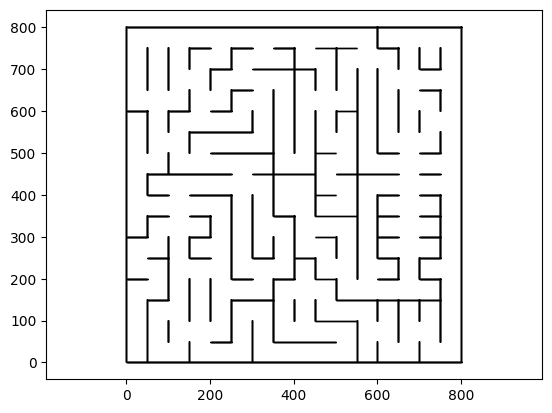

In [9]:
fig, ax = plt.subplots(1, 1)
ax.axis('equal')
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)

In [10]:
data = np.zeros(12*walls.shape[0], dtype=mesh.Mesh.dtype)
index = 0
for wall in walls:
    y_dim = 16
    space = 50
    if wall[0, 0] == wall[1, 0]:
        p0 = [space * wall[0, 0], space * (y_dim - wall[0, 1]), 0]
        p1 = [space * wall[1, 0], space * (y_dim - wall[1, 1]), 0]
        p2 = [space * wall[0, 0] + 2, space * (y_dim - wall[0, 1]), 0]
        p3 = [space * wall[1, 0] + 2, space * (y_dim - wall[1, 1]), 0]
        p4 = [space * wall[0, 0], space * (y_dim - wall[0, 1]), 20]
        p5 = [space * wall[1, 0], space * (y_dim - wall[1, 1]), 20]
        p6 = [space * wall[0, 0] + 2, space * (y_dim - wall[0, 1]), 20]
        p7 = [space * wall[1, 0] + 2, space * (y_dim - wall[1, 1]), 20]
    else:
        p0 = [space * wall[0, 0], space * (y_dim - wall[0, 1]), 0]
        p1 = [space * wall[1, 0], space * (y_dim - wall[1, 1]), 0]
        p2 = [space * wall[0, 0], space * (y_dim - wall[0, 1]) + 2, 0]
        p3 = [space * wall[1, 0], space * (y_dim - wall[1, 1]) + 2, 0]
        p4 = [space * wall[0, 0], space * (y_dim - wall[0, 1]), 20]
        p5 = [space * wall[1, 0], space * (y_dim - wall[1, 1]), 20]
        p6 = [space * wall[0, 0], space * (y_dim - wall[0, 1]) + 2, 20]
        p7 = [space * wall[1, 0], space * (y_dim - wall[1, 1]) + 2, 20]
    data['vectors'][index] = np.array([p1, p0, p2])
    data['vectors'][index + 1] = np.array([p1, p2, p3])
    data['vectors'][index + 2] = np.array([p4, p5, p6])
    data['vectors'][index + 3] = np.array([p6, p5, p7])
    data['vectors'][index + 4] = np.array([p0, p1, p4])
    data['vectors'][index + 5] = np.array([p4, p1, p5])
    data['vectors'][index + 6] = np.array([p3, p2, p6])
    data['vectors'][index + 7] = np.array([p3, p6, p7])
    data['vectors'][index + 8] = np.array([p2, p0, p4])
    data['vectors'][index + 9] = np.array([p2, p4, p6])
    data['vectors'][index + 10] = np.array([p1, p3, p5])
    data['vectors'][index + 11] = np.array([p5, p3, p7])
    index += 12
    
env = mesh.Mesh(data, remove_empty_areas=False)
env.update_units()

In [11]:
env.save('maze.stl')